# Capstone Project-The Battle of Neighborhoods (Week 2)
# Moyinoluwa Adebola Adeniyi

## EXPLORING MUMBAI NEIGHBORHOODS FOR STARTING A RESTAURANT
## Table of content 
1. Introduction
2. Data Collection 
3. Methodology
4. Results 
5. Discussion
6. Conclusion


## Introducion: Business Problem
“Life is beautiful.” What really makes life beautiful? To me, the beauty of life is a reflection of the beauty of the people. Human connections, affiliations and relationships are the ingredients cooked up to make the beauty of life. There are many ways people connect, one of which are places such as restaurants. The business of running a restaurant has several benefits which can’t be over emphasized. In this project, I will be exploring Mumbai neighborhood data with the aim of starting a restaurant. 
Mumbai, also known as Bombay is the capital city of the Indian. According to the United Nations, as of 2018, Mumbai is the second-most populous city in the country after Delhi and the seventh-most populous city in the world with a population of roughly 20 million. Mumbai is the financial, commercial, and the entertainment capital of India.  It is also one of the world's top ten centres of commerce in terms of global financial flow, generating 6.16% of India's GDP, and accounting for 25% of industrial output, 70% of maritime trade in India (Mumbai Port Trust and JNPT), and 70% of capital transactions to India's economy (Mahajan Poonam; July, 2014).
Everyone, irrespective or race, religion or background loves food and the people of India are not an exception. Thus, the aim of this project is to study the neighborhoods in Mumbai to determine possible locations for starting a restaurant. 
This findings/results from this project can be a powerful resource/tool for business owners and entrepreneurs who are looking to invest in a restaurant in Mumbai. The main objective of this project is to carefully analyze appropriate data and find recommendations for the stakeholders concerning the best areas/neighborhoods to invest in. 



## Data Collection 
The required data for this project include the following:
1) Neighborhood data of Mumbai was scrapped from the webpage below:
https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai
2) Geographical coordinates of Mumbai and its Neighborhood was obtained using GeoPy library in python.
3) Venue data for neighborhoods in Mumbai was obtained using Foursquare API. 
Finally, Folium library was employed in visualizing the obtained data.

    



# Importing Libraries 

In [1]:
!pip install geopy
!pip install geocoder
!pip install folium

import numpy as np
import pandas as pd
import json
from geopy.geocoders import Nominatim
import geocoder
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize
from sklearn.metrics import silhouette_score

%matplotlib notebook

print('All libraries imported.')

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 98 kB 11.9 MB/s eta 0:00:01
/opt/conda/envs/Python-3.7-main/

# Data Retrieval
### Scraping data

In [4]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai')[-1]
df.rename(columns={'Area': 'Neighborhood'}, inplace=True)
df.head(10)

,Neighborhood,Location,Latitude,Longitude
0,Amboli,"Andheri,Western Suburbs",19.129300,72.843400
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373
3,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.827210
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.829270
5,Marol,"Andheri,Western Suburbs",19.119219,72.882743
6,Sahar,"Andheri,Western Suburbs",19.098889,72.867222
7,Seven Bungalows,"Andheri,Western Suburbs",19.129052,72.817018
8,Versova,"Andheri,Western Suburbs",19.120000,72.820000
9,Mira Road,"Mira-Bhayandar,Western Suburbs",19.284167,72.871111


### Checking the shape of the dataset

In [5]:
df.shape

(93, 4)

# Data Wrangling
### Lets look at the different values for Location present in the Location column.

In [6]:
df['Location'].value_counts()

South Mumbai                       30
Andheri,Western Suburbs             8
Western Suburbs                     6
Eastern Suburbs                     4
Ghatkopar,Eastern Suburbs           3
Bandra,Western Suburbs              3
Kandivali West,Western Suburbs      3
Powai,Eastern Suburbs               3
Mira-Bhayandar,Western Suburbs      3
Mumbai                              2
Vasai,Western Suburbs               2
Khar,Western Suburbs                2
Malad,Western Suburbs               2
Borivali (West),Western Suburbs     2
Kalbadevi,South Mumbai              2
Goregaon,Western Suburbs            2
Harbour Suburbs                     2
Colaba,South Mumbai                 1
Antop Hill,South Mumbai             1
Fort,South Mumbai                   1
Byculla,South Mumbai                1
Govandi,Harbour Suburbs             1
Kandivali East,Western Suburbs      1
Dadar,South Mumbai                  1
Kurla,Eastern Suburbs               1
Mulund,Eastern Suburbs              1
Tardeo,South

### Now, lets clean the Location column to make it easier to understand.

In [7]:
df['Location'] = df['Location'].apply(lambda x: x.split(',')[-1])
df.head(10)

,Neighborhood,Location,Latitude,Longitude
0,Amboli,Western Suburbs,19.129300,72.843400
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,Western Suburbs,19.124085,72.831373
3,Four Bungalows,Western Suburbs,19.124714,72.827210
4,Lokhandwala,Western Suburbs,19.130815,72.829270
5,Marol,Western Suburbs,19.119219,72.882743
6,Sahar,Western Suburbs,19.098889,72.867222
7,Seven Bungalows,Western Suburbs,19.129052,72.817018
8,Versova,Western Suburbs,19.120000,72.820000
9,Mira Road,Western Suburbs,19.284167,72.871111


In [8]:
df.shape

(93, 4)

### Now, lets look at the values in Location column again.

In [9]:
df['Location'].value_counts()

South Mumbai       39
Western Suburbs    36
Eastern Suburbs    12
Harbour Suburbs     4
Mumbai              2
Name: Location, dtype: int64

### Now that the data is much easier to interpret, lets display the dataframe created.

In [10]:
df

,Neighborhood,Location,Latitude,Longitude
0,Amboli,Western Suburbs,19.129300,72.843400
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,Western Suburbs,19.124085,72.831373
3,Four Bungalows,Western Suburbs,19.124714,72.827210
4,Lokhandwala,Western Suburbs,19.130815,72.829270
...,...,...,...,...
88,Parel,South Mumbai,18.990000,72.840000
89,Gowalia Tank,South Mumbai,18.962450,72.809703
90,Dava Bazaar,South Mumbai,18.946882,72.831362
91,Dharavi,Mumbai,19.040208,72.850850


### Although the data gathered contains latitude and longitude information, we can reconfirm these coordinates using Geocoder.

In [14]:
df['Latitude1'] = None
df['Longitude1'] = None

for i, neigh in enumerate(df['Neighborhood']):
    lat_lng_coords = None
    
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, mumbai, India'.format(neigh))
        lat_lng_coords = g.latlng
    
    if lat_lng_coords:
        latitude = lat_lng_coords[0]
        longitude = lat_lng_coords[1]
    
    df.loc[i, 'Latitude1'] = latitude
    df.loc[i, 'Longitude1'] = longitude

df.head(10)

,Neighborhood,Location,Latitude,Longitude,Latitude1,Longitude1
0,Amboli,Western Suburbs,19.129300,72.843400,19.1291,72.8464
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833,19.1084,72.8623
2,D.N. Nagar,Western Suburbs,19.124085,72.831373,19.1251,72.8325
3,Four Bungalows,Western Suburbs,19.124714,72.827210,19.1264,72.8242
4,Lokhandwala,Western Suburbs,19.130815,72.829270,19.1432,72.8249
5,Marol,Western Suburbs,19.119219,72.882743,19.1191,72.8828
6,Sahar,Western Suburbs,19.098889,72.867222,19.1027,72.8626
7,Seven Bungalows,Western Suburbs,19.129052,72.817018,19.1286,72.8212
8,Versova,Western Suburbs,19.120000,72.820000,19.1377,72.8135
9,Mira Road,Western Suburbs,19.284167,72.871111,19.2656,72.8706


In [15]:
df.shape

(93, 6)

### We can create new columns to see the difference between coordinate values obtained from wikipedia and those obtained from geocoder. We will take the absolute difference between these values and store them in our dataframe.

In [16]:
df['Latdiff'] = abs(df['Latitude'] - df['Latitude1'])
df['Longdiff'] = abs(df['Longitude'] - df['Longitude1'])
df.head(10)

,Neighborhood,Location,Latitude,Longitude,Latitude1,Longitude1,Latdiff,Longdiff
0,Amboli,Western Suburbs,19.129300,72.843400,19.1291,72.8464,0.00024,0.00304
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833,19.1084,72.8623,0.003028,0.001497
2,D.N. Nagar,Western Suburbs,19.124085,72.831373,19.1251,72.8325,0.000965,0.001107
3,Four Bungalows,Western Suburbs,19.124714,72.827210,19.1264,72.8242,0.001666,0.00301
4,Lokhandwala,Western Suburbs,19.130815,72.829270,19.1432,72.8249,0.012345,0.0044
5,Marol,Western Suburbs,19.119219,72.882743,19.1191,72.8828,0.000169,6.7e-05
6,Sahar,Western Suburbs,19.098889,72.867222,19.1027,72.8626,0.00377822,0.00462255
7,Seven Bungalows,Western Suburbs,19.129052,72.817018,19.1286,72.8212,0.000492,0.004162
8,Versova,Western Suburbs,19.120000,72.820000,19.1377,72.8135,0.01769,0.00652
9,Mira Road,Western Suburbs,19.284167,72.871111,19.2656,72.8706,0.0185438,0.000467611


### We can see that the latitude and longitudes from wikipedia and geocoder are very similar, yet there are some differences. We will replace the values with the coordinates obtained from geocoder if the absolute difference is more than 0.001.

In [17]:
df.loc[df.Latdiff>0.001, 'Latitude'] = df.loc[df.Latdiff>0.001, 'Latitude1']
df.loc[df.Longdiff>0.001, 'Longitude'] = df.loc[df.Longdiff>0.001, 'Longitude1']
df.head(10)

,Neighborhood,Location,Latitude,Longitude,Latitude1,Longitude1,Latdiff,Longdiff
0,Amboli,Western Suburbs,19.1293,72.8464,19.1291,72.8464,0.00024,0.00304
1,"Chakala, Andheri",Western Suburbs,19.1084,72.8623,19.1084,72.8623,0.003028,0.001497
2,D.N. Nagar,Western Suburbs,19.1241,72.8325,19.1251,72.8325,0.000965,0.001107
3,Four Bungalows,Western Suburbs,19.1264,72.8242,19.1264,72.8242,0.001666,0.00301
4,Lokhandwala,Western Suburbs,19.1432,72.8249,19.1432,72.8249,0.012345,0.0044
5,Marol,Western Suburbs,19.1192,72.8827,19.1191,72.8828,0.000169,6.7e-05
6,Sahar,Western Suburbs,19.1027,72.8626,19.1027,72.8626,0.00377822,0.00462255
7,Seven Bungalows,Western Suburbs,19.1291,72.8212,19.1286,72.8212,0.000492,0.004162
8,Versova,Western Suburbs,19.1377,72.8135,19.1377,72.8135,0.01769,0.00652
9,Mira Road,Western Suburbs,19.2656,72.8711,19.2656,72.8706,0.0185438,0.000467611


### In order to confirm if values have actually been replaced we can use the where method. Values with NaN means those values have not been replaced.

In [18]:
df.where(df['Latitude']==df['Latitude1'])

,Neighborhood,Location,Latitude,Longitude,Latitude1,Longitude1,Latdiff,Longdiff
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Chakala, Andheri",Western Suburbs,19.1084,72.8623,19.1084,72.8623,0.003028,0.001497
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Four Bungalows,Western Suburbs,19.1264,72.8242,19.1264,72.8242,0.001666,0.00301
4,Lokhandwala,Western Suburbs,19.1432,72.8249,19.1432,72.8249,0.012345,0.0044
...,...,...,...,...,...,...,...,...
88,Parel,South Mumbai,18.9957,72.84,18.9957,72.8391,0.0057,0.00087
89,Gowalia Tank,South Mumbai,18.9645,72.8112,18.9645,72.8112,0.00201,0.001467
90,Dava Bazaar,South Mumbai,19.1314,72.927,19.1314,72.927,0.184518,0.095598
91,Dharavi,Mumbai,19.0467,72.8546,19.0467,72.8546,0.006532,0.00376


### Now, let's do the same for the Longitude column.

In [19]:
df.where(df['Longitude']==df['Longitude1'])

,Neighborhood,Location,Latitude,Longitude,Latitude1,Longitude1,Latdiff,Longdiff
0,Amboli,Western Suburbs,19.1293,72.8464,19.1291,72.8464,0.00024,0.00304
1,"Chakala, Andheri",Western Suburbs,19.1084,72.8623,19.1084,72.8623,0.003028,0.001497
2,D.N. Nagar,Western Suburbs,19.1241,72.8325,19.1251,72.8325,0.000965,0.001107
3,Four Bungalows,Western Suburbs,19.1264,72.8242,19.1264,72.8242,0.001666,0.00301
4,Lokhandwala,Western Suburbs,19.1432,72.8249,19.1432,72.8249,0.012345,0.0044
...,...,...,...,...,...,...,...,...
88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,Gowalia Tank,South Mumbai,18.9645,72.8112,18.9645,72.8112,0.00201,0.001467
90,Dava Bazaar,South Mumbai,19.1314,72.927,19.1314,72.927,0.184518,0.095598
91,Dharavi,Mumbai,19.0467,72.8546,19.0467,72.8546,0.006532,0.00376


### Now that we have the data, we can drop the columns that are no longer useful.

In [20]:
df.drop(['Latitude1', 'Longitude1', 'Latdiff', 'Longdiff'], axis=1, inplace=True)
df.head(10)

,Neighborhood,Location,Latitude,Longitude
0,Amboli,Western Suburbs,19.1293,72.8464
1,"Chakala, Andheri",Western Suburbs,19.1084,72.8623
2,D.N. Nagar,Western Suburbs,19.1241,72.8325
3,Four Bungalows,Western Suburbs,19.1264,72.8242
4,Lokhandwala,Western Suburbs,19.1432,72.8249
5,Marol,Western Suburbs,19.1192,72.8827
6,Sahar,Western Suburbs,19.1027,72.8626
7,Seven Bungalows,Western Suburbs,19.1291,72.8212
8,Versova,Western Suburbs,19.1377,72.8135
9,Mira Road,Western Suburbs,19.2656,72.8711


# Data Visualization
### To understand our data better, we can see how many neighborhoods are in each location.

In [23]:
neighborhoods_mumbai = df.groupby('Location')['Neighborhood'].nunique()
neighborhoods_mumbai

Location
Eastern Suburbs    12
Harbour Suburbs     4
Mumbai              2
South Mumbai       39
Western Suburbs    36
Name: Neighborhood, dtype: int64

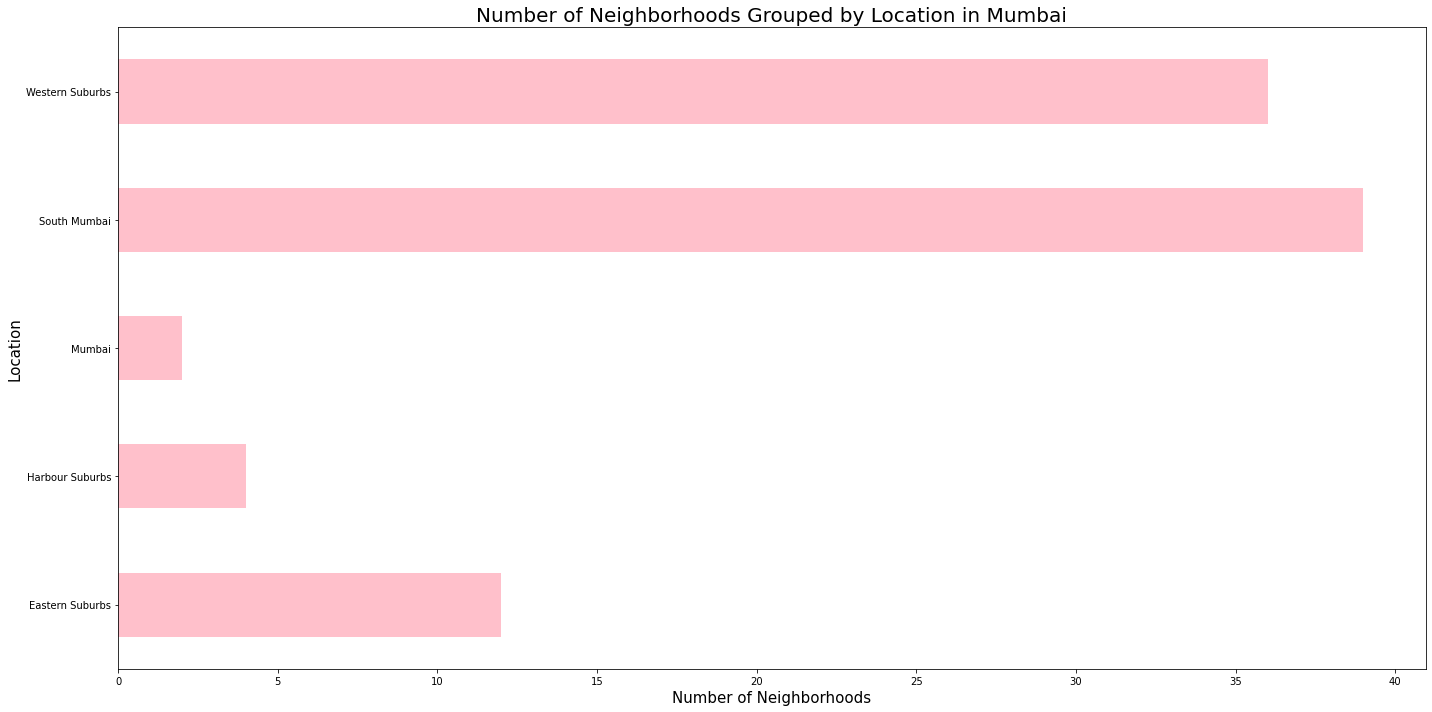

In [26]:
%matplotlib inline
fig = plt.figure(figsize=(20,10))

ax = neighborhoods_mumbai.plot(kind='barh', color='pink')
ax.set_title('Number of Neighborhoods Grouped by Location in Mumbai', fontsize=20)
ax.set_xlabel('Number of Neighborhoods', fontsize=15)
ax.set_ylabel('Location', fontsize=15)
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.tick_params(which='major', left=True)

fig.tight_layout()
fig.show()

### Clearly we can see that South and East Chennai and North Chennaai have the most number of neighborhoods.
### Now lets visualize the neighborhoods on a map using Folium. First we will obtain the geographical coordinates of Mumbai using GeoPy.

In [27]:
address = 'Mumbai, IN'

geolocator = Nominatim(user_agent="coursera-capstone-project")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Mumbai are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Mumbai are 19.0759899, 72.8773928.


### Now that we have the coordinaytes, we can plot the map.

In [29]:
map_mum = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, location, neighborhood in zip(df['Latitude'], df['Longitude'], df['Location'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, location)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mum)  
    
map_mum

# Using Foursquare API
</b> Now we can start working with the Foursquare API to obtain venue recommendations.
Lets create the Foursquare credentials first

In [30]:
CLIENT_ID = 'JP4I1NQMUVNDYZCWCBD231SIJZUIBDIUC0YTOHGHI3B5OIMN' 
CLIENT_SECRET = 'KT1DD041VFCAQI2DRMXLNGJIGMPUMTQW0GJR42YUALEMDVGY'
VERSION = '20180604' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JP4I1NQMUVNDYZCWCBD231SIJZUIBDIUC0YTOHGHI3B5OIMN
CLIENT_SECRET:KT1DD041VFCAQI2DRMXLNGJIGMPUMTQW0GJR42YUALEMDVGY


### Lets start by exploring just the first neighborhood in our dataframe using Foursquare API.

In [32]:
neighborhood_name = df.loc[0, 'Neighborhood']
neighborhood_lat = df.loc[0, 'Latitude']
neighborhood_long = df.loc[0, 'Longitude']

print("The neighborhood is {} and it's geographical coordinates are {} latitude and {} longitude".format(neighborhood_name,
                                                                                                        neighborhood_lat, neighborhood_long))

The neighborhood is Amboli and it's geographical coordinates are 19.1293 latitude and 72.84644000000003 longitude


### We will now extract the top 200 venues near Amboli with a radius of 1000m or 1km. In order to do this, we will start by creating a url.

In [33]:
LIMIT = 200
radius = 1000

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_lat, 
    neighborhood_long, 
    radius, 
    LIMIT)

### We can now use the GET method to get our results.

In [34]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60a153afb3cf2e62a837f1f3'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Jogeshwari West',
  'headerFullLocation': 'Jogeshwari West, Mumbai',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 24,
  'suggestedBounds': {'ne': {'lat': 19.13830000900001,
    'lng': 72.85594823590122},
   'sw': {'lat': 19.120299990999992, 'lng': 72.83693176409884}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4e4eb3c68877402b06b92160',
       'name': '5 Spice , Bandra',
       'location': {'address': 'Pali Naka, Bandra west',
        'lat': 19.130421080343595,
        'lng': 72.84720633881638,
        'labeledLatLngs': [{'label': 'display',
    

### We will now create a function get_category_type to extract the categories of venues.

In [35]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Now we can clean the JSON obtained using the GET method and store our results in a dataframe.

In [36]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues)

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,"5 Spice , Bandra",Chinese Restaurant,19.130421,72.847206
1,Cafe Arfa,Indian Restaurant,19.128930,72.847140
2,Jaffer Bhai's Delhi Darbar,Mughlai Restaurant,19.137714,72.845909
3,Narayan Sandwich,Sandwich Place,19.121398,72.850270
4,Shawarma Factory,Falafel Restaurant,19.124591,72.840398


In [37]:
print("{} venues were returned for {} by Foursquare".format(len(nearby_venues), neighborhood_name))

24 venues were returned for Amboli by Foursquare


# Generalizing Foursquare API
Now that we have seen how the API call works and how we can clean our data to get relevant information, we can generalize this procedure to get nearby venues for all neighborhoods by creating the function getNearbyVenues

In [38]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### We can apply the function created to get nearby venues for all neighborhoods in Mumbai. We will get 200 nearby venues within a 1km radius, same as before.

In [40]:
mum_venues = getNearbyVenues(names=df['Neighborhood'], latitudes=df['Latitude'], longitudes=df['Longitude'], radius=radius)

Amboli
Chakala, Andheri
D.N. Nagar
Four Bungalows
Lokhandwala
Marol
Sahar
Seven Bungalows
Versova
Mira Road
Bhayandar
Uttan
Bandstand Promenade
Kherwadi
Pali Hill
I.C. Colony
Gorai
Dahisar
Aarey Milk Colony
Bangur Nagar
Jogeshwari West
Juhu
Charkop
Poisar
Mahavir Nagar
Thakur village
Pali Naka
Khar Danda
Dindoshi
Sunder Nagar
Kalina
Naigaon
Nalasopara
Virar
Irla
Vile Parle
Bhandup
Amrut Nagar
Asalfa
Pant Nagar
Kanjurmarg
Nehru Nagar
Nahur
Chandivali
Hiranandani Gardens
Indian Institute of Technology Bombay campus
Vidyavihar
Vikhroli
Chembur
Deonar
Mankhurd
Mahul
Agripada
Altamount Road
Bhuleshwar
Breach Candy
Carmichael Road
Cavel
Churchgate
Cotton Green
Cuffe Parade
Cumbala Hill
Currey Road
Dhobitalao
Dongri
Kala Ghoda
Kemps Corner
Lower Parel
Mahalaxmi
Mahim
Malabar Hill
Marine Drive
Marine Lines
Mumbai Central
Nariman Point
Prabhadevi
Sion
Walkeshwar
Worli
C.G.S. colony
Dagdi Chawl
Navy Nagar
Hindu colony
Ballard Estate
Chira Bazaar
Fanas Wadi
Chor Bazaar
Matunga
Parel
Gowalia Tank


### Now, lets view the dataframe and see what it looks like 

In [41]:
print(mum_venues.shape)
mum_venues.head(10)

(3555, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Amboli,19.1293,72.84644,"5 Spice , Bandra",19.130421,72.847206,Chinese Restaurant
1,Amboli,19.1293,72.84644,Cafe Arfa,19.128930,72.847140,Indian Restaurant
2,Amboli,19.1293,72.84644,Jaffer Bhai's Delhi Darbar,19.137714,72.845909,Mughlai Restaurant
3,Amboli,19.1293,72.84644,Narayan Sandwich,19.121398,72.850270,Sandwich Place
4,Amboli,19.1293,72.84644,Shawarma Factory,19.124591,72.840398,Falafel Restaurant
5,Amboli,19.1293,72.84644,Persia Darbar,19.136952,72.846822,Indian Restaurant
6,Amboli,19.1293,72.84644,Sarvodaya Veg. Restaurant,19.123760,72.850893,Indian Restaurant
7,Amboli,19.1293,72.84644,Domino's Pizza,19.131000,72.848000,Pizza Place
8,Amboli,19.1293,72.84644,Garden Court,19.127188,72.837478,Indian Restaurant
9,Amboli,19.1293,72.84644,Subway,19.127860,72.844461,Sandwich Place


### Lets see how many venues were returned for each neighborhood.

In [42]:
mum_venues.groupby('Neighborhood', as_index=False).count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Aarey Milk Colony,13,13,13,13,13,13
1,Agripada,30,30,30,30,30,30
2,Altamount Road,66,66,66,66,66,66
3,Amboli,24,24,24,24,24,24
4,Amrut Nagar,12,12,12,12,12,12
...,...,...,...,...,...,...,...
88,Vikhroli,12,12,12,12,12,12
89,Vile Parle,74,74,74,74,74,74
90,Virar,11,11,11,11,11,11
91,Walkeshwar,11,11,11,11,11,11


### Let's check how many unique categories are there in our data.

In [43]:
print("There are {} unique categories".format(mum_venues['Venue Category'].nunique()))

There are 223 unique categories


# Analyzing each neighborhood
We can start analyzing each neighborhood by One-hot Encoding to see which categories belong in which neighborhoods.

In [44]:
mum_onehot = pd.get_dummies(mum_venues[['Venue Category']], prefix="", prefix_sep="")
mum_onehot.head()

,Accessories Store,Airport,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Arcade,Art Gallery,Arts & Crafts Store,...,Train,Train Station,Vegetarian / Vegan Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Adding Neighborhood column to the one-hot encoded dataframe.

In [45]:
mum_onehot['Neighborhood'] = mum_venues['Neighborhood']
mum_onehot.head()

,Accessories Store,Airport,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Arcade,Art Gallery,Arts & Crafts Store,...,Train,Train Station,Vegetarian / Vegan Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Adding Neighborhood column to the one-hot encoded dataframe.

In [46]:
temp = list(mum_onehot.columns)

if 'Neighborhood' in temp:
    temp.remove('Neighborhood')
    
fixed_columns = ['Neighborhood'] + temp
mum_onehot = mum_onehot[fixed_columns]

mum_onehot.head()

,Neighborhood,Accessories Store,Airport,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Arcade,Art Gallery,...,Train,Train Station,Vegetarian / Vegan Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Adding Neighborhood column to the one-hot encoded dataframe.

In [47]:
mum_grouped = mum_onehot.groupby('Neighborhood', sort=False).mean().reset_index()
print(mum_grouped.shape)
mum_grouped.head(10)

(93, 223)


,Neighborhood,Accessories Store,Airport,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Arcade,Art Gallery,...,Train,Train Station,Vegetarian / Vegan Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,Amboli,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,"Chakala, Andheri",0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.046512,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,D.N. Nagar,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.022222,0.044444,0.0,0.0,0.0,0.0,0.022222,0.0,0.0
3,Four Bungalows,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.035088,0.0,0.0,0.0,0.0,0.017544,0.0,0.0
4,Lokhandwala,0.0,0.0,0.0,0.0,0.010753,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.010753,0.0,0.0,0.0,0.0,0.010753,0.0,0.0
5,Marol,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
6,Sahar,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
7,Seven Bungalows,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.032787,0.0,0.0,0.0,0.0,0.016393,0.0,0.0
8,Versova,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
9,Mira Road,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


### In order to further understand the data, we can display the top 5 venues of all neighborhoods.

In [49]:
num_top_venues = 5

for hood in mum_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = mum_grouped[mum_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Amboli----
               venue  freq
0  Indian Restaurant  0.17
1   Asian Restaurant  0.08
2     Sandwich Place  0.08
3             Bakery  0.08
4                Bar  0.08


----Chakala, Andheri----
               venue  freq
0              Hotel  0.16
1  Indian Restaurant  0.12
2               Café  0.09
3         Restaurant  0.07
4                Bar  0.07


----D.N. Nagar----
                  venue  freq
0                   Bar  0.11
1     Indian Restaurant  0.09
2                   Pub  0.09
3  Gym / Fitness Center  0.07
4           Pizza Place  0.07


----Four Bungalows----
               venue  freq
0  Indian Restaurant  0.07
1                Pub  0.07
2               Café  0.07
3                Bar  0.05
4     Ice Cream Shop  0.05


----Lokhandwala----
                venue  freq
0   Indian Restaurant  0.12
1                Café  0.08
2  Chinese Restaurant  0.06
3                 Pub  0.04
4         Coffee Shop  0.03


----Marol----
                venue  freq
0   Indian R

               venue  freq
0  Indian Restaurant  0.29
1       Dessert Shop  0.10
2    Harbor / Marina  0.06
3          Juice Bar  0.06
4  Convenience Store  0.06


----Kala Ghoda----
               venue  freq
0  Indian Restaurant  0.13
1               Café  0.10
2        Coffee Shop  0.06
3              Hotel  0.05
4                Bar  0.05


----Kemps Corner----
               venue  freq
0  Indian Restaurant  0.10
1               Café  0.08
2             Bakery  0.08
3        Coffee Shop  0.05
4     Sandwich Place  0.05


----Lower Parel----
               venue  freq
0  Indian Restaurant  0.08
1               Café  0.06
2             Lounge  0.04
3                Pub  0.04
4   Asian Restaurant  0.04


----Mahalaxmi----
                venue  freq
0   Indian Restaurant  0.20
1                Café  0.05
2              Bakery  0.05
3      Cricket Ground  0.04
4  Chinese Restaurant  0.04


----Mahim----
                  venue  freq
0     Indian Restaurant  0.15
1  Fast Food Restauran

### Lets now create a dataframe with the top 10 common venues for each neighborhood.

In [50]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [51]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = mum_grouped['Neighborhood']

for ind in np.arange(mum_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mum_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amboli,Indian Restaurant,Pizza Place,Sandwich Place,Bar,Asian Restaurant,Bakery,Mughlai Restaurant,Snack Place,Metro Station,Burger Joint
1,"Chakala, Andheri",Hotel,Indian Restaurant,Café,Restaurant,Bar,Pizza Place,Asian Restaurant,Hotel Bar,Fast Food Restaurant,Multiplex
2,D.N. Nagar,Bar,Indian Restaurant,Pub,Pizza Place,Gym / Fitness Center,Snack Place,Vegetarian / Vegan Restaurant,Coffee Shop,Juice Bar,Clothing Store
3,Four Bungalows,Indian Restaurant,Pub,Café,Ice Cream Shop,Seafood Restaurant,Bar,Chinese Restaurant,Lounge,Pizza Place,Gym / Fitness Center
4,Lokhandwala,Indian Restaurant,Café,Chinese Restaurant,Pub,Bar,Coffee Shop,Gym / Fitness Center,Italian Restaurant,Seafood Restaurant,Bengali Restaurant
...,...,...,...,...,...,...,...,...,...,...,...
88,Parel,Indian Restaurant,Coffee Shop,Pharmacy,Bar,Playground,Plaza,Chinese Restaurant,Moving Target,Cafeteria,Restaurant
89,Gowalia Tank,Indian Restaurant,Café,Fast Food Restaurant,Bakery,Snack Place,Coffee Shop,Sandwich Place,Electronics Store,Pizza Place,Vegetarian / Vegan Restaurant
90,Dava Bazaar,Indian Restaurant,Train Station,Coffee Shop,Beer Garden,Asian Restaurant,Restaurant,Fish Market,Cupcake Shop,Café,Farmers Market
91,Dharavi,Indian Restaurant,Café,Snack Place,Seafood Restaurant,Sandwich Place,Luggage Store,Food & Drink Shop,Bus Station,Lake,Juice Bar


# Clustering neighborhoods
</h2> Now we can use KMeans clustering method to cluster the neighborhoods.
First we need to determine how many clusters to use. This will be done using the Silhouette Score.

We will define a function to plot the Silhouette Score that will be calculated using different number of clusters.

In [52]:
def plot(x, y):
    fig = plt.figure(figsize=(12,6))
    plt.plot(x, y, 'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Scores')
    plt.title('Checking Optimum Number of Clusters')
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

In [53]:
maxk = 15
scores = []
kval = []

for k in range(2, maxk+1):
    cl_df = mum_grouped.drop('Neighborhood', axis=1)
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=40).fit_predict(cl_df) #Choose any random_state
    
    score = silhouette_score(cl_df, kmeans, metric='euclidean', random_state=0)
    kval.append(k)
    scores.append(score)

### We can now display the scores for different number of clusters and plot the data as well.

[0.09248017531730994, 0.07221974885264447, 0.09521916691875677, 0.08812329736839407, 0.09330993184033015, 0.035016768651583804, 0.08748400858890021, 0.08453708908337813, 0.07995439458122719, 0.05748330596074932, 0.062387445174732034, 0.05886095406440405, 0.048875193636398244, 0.051566173977366764]
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


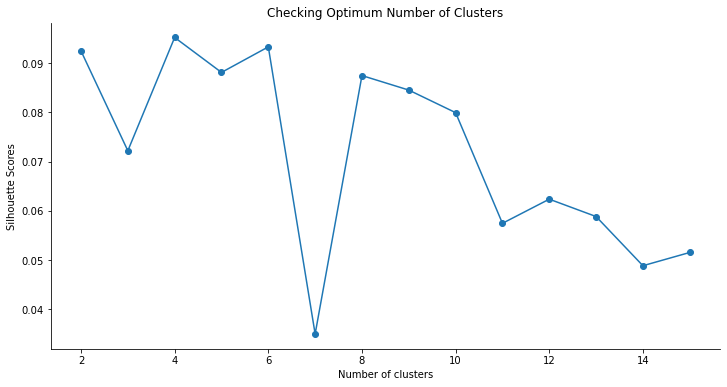

In [54]:
%matplotlib inline
print(scores)
print(kval)
plot(kval, scores)

In [55]:
k = 11

mum_clustering = mum_grouped.drop('Neighborhood', axis=1)
kmeans = KMeans(n_clusters=k, init="k-means++", random_state=40).fit(mum_clustering) #Can choose any random_state

kmeans.labels_

array([ 5,  9,  2,  2,  2,  1,  9,  2,  2,  5,  5, 10,  5,  2,  2,  5,  7,
        2,  2,  5,  2,  5,  2,  2,  5,  2,  2,  5,  2,  1,  5,  5,  0,  5,
        5,  5,  4,  1,  2,  1,  6,  2,  2,  1,  5,  5,  1,  1,  1,  2,  4,
        1,  5,  5,  1,  2,  2,  1,  5,  8,  5,  2,  5,  1,  1,  5,  5,  2,
        1,  5,  5,  1,  1,  2,  5,  2,  1,  5,  5,  1,  5,  2,  1,  1,  1,
        1,  1,  1,  5,  5,  4,  1,  3], dtype=int32)

###  Now we can create a new dataframe that includes cluster labels and the top 10 venues.

In [72]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
mum_merged = df
mum_merged = mum_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

In [73]:
print(mum_merged.shape)
mum_merged

(93, 15)


,Neighborhood,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amboli,Western Suburbs,19.1293,72.8464,3,Indian Restaurant,Bar,Coffee Shop,Pizza Place,Asian Restaurant,Sandwich Place,Bike Rental / Bike Share,Bakery,Camera Store,Bowling Alley
1,"Chakala, Andheri",Western Suburbs,19.1084,72.8623,0,Hotel,Indian Restaurant,Café,Hotel Bar,Fast Food Restaurant,Food Truck,Restaurant,Asian Restaurant,Pizza Place,Multiplex
2,D.N. Nagar,Western Suburbs,19.1241,72.8325,0,Bar,Pub,Indian Restaurant,Pizza Place,Gym / Fitness Center,Women's Store,Lounge,Vegetarian / Vegan Restaurant,Snack Place,Hotel Bar
3,Four Bungalows,Western Suburbs,19.1264,72.8242,0,Chinese Restaurant,Café,Pub,Indian Restaurant,Ice Cream Shop,Bar,Lounge,Seafood Restaurant,Pizza Place,Coffee Shop
4,Lokhandwala,Western Suburbs,19.1432,72.8249,0,Indian Restaurant,Chinese Restaurant,Café,Pub,Coffee Shop,Gym / Fitness Center,Bar,Italian Restaurant,Pizza Place,Bengali Restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Parel,South Mumbai,18.9957,72.84,3,Indian Restaurant,Chinese Restaurant,Coffee Shop,Bar,Plaza,Cosmetics Shop,Maharashtrian Restaurant,Lounge,Roof Deck,Restaurant
89,Gowalia Tank,South Mumbai,18.9645,72.8112,0,Indian Restaurant,Café,Fast Food Restaurant,Bakery,Coffee Shop,Snack Place,Electronics Store,Chinese Restaurant,Sandwich Place,Pizza Place
90,Dava Bazaar,South Mumbai,19.1314,72.927,7,Train Station,Café,Coffee Shop,Hotel,Cupcake Shop,Beer Garden,Multiplex,Fish Market,Indian Restaurant,Smoke Shop
91,Dharavi,Mumbai,19.0467,72.8546,8,Indian Restaurant,Garden,Diner,Snack Place,Seafood Restaurant,Fast Food Restaurant,Sandwich Place,Luggage Store,Café,Lake


In [74]:
mum_merged = mum_merged.dropna()
mum_merged = mum_merged.reset_index(drop=True)

print (mum_merged)

        Neighborhood         Location Latitude Longitude  Cluster Labels  \
0             Amboli  Western Suburbs  19.1293   72.8464               3   
1   Chakala, Andheri  Western Suburbs  19.1084   72.8623               0   
2         D.N. Nagar  Western Suburbs  19.1241   72.8325               0   
3     Four Bungalows  Western Suburbs  19.1264   72.8242               0   
4        Lokhandwala  Western Suburbs  19.1432   72.8249               0   
..               ...              ...      ...       ...             ...   
88             Parel     South Mumbai  18.9957     72.84               3   
89      Gowalia Tank     South Mumbai  18.9645   72.8112               0   
90       Dava Bazaar     South Mumbai  19.1314    72.927               7   
91           Dharavi           Mumbai  19.0467   72.8546               8   
92             Thane           Mumbai  19.1409   72.8826               5   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0      Indian R

In [75]:
mum_merged.shape

(93, 15)

### We can visualize the clustering by creating a map.

In [1]:
%matplotlib inline
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

x = np.arange(k)
#print(x)
ys = [i + x + (i*x)**2 for i in range(k)]
#print(ys)
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
#print(colors_array)

markers_colors = []
for lat, lon, poi, cluster in zip(mum_merged['Latitude'], mum_merged['Longitude'], mum_merged['Neighborhood'], mum_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

NameError: name 'folium' is not defined

## We can now view the neighborhoods in each cluster and their top 10 most common venues.

## First Cluster

In [77]:
mum_merged.loc[mum_merged['Cluster Labels'] == 0, mum_merged.columns[[0] + [1] + list(range(5, mum_merged.shape[1]))]]

,Neighborhood,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,"Chakala, Andheri",Western Suburbs,Hotel,Indian Restaurant,Café,Hotel Bar,Fast Food Restaurant,Food Truck,Restaurant,Asian Restaurant,Pizza Place,Multiplex
2,D.N. Nagar,Western Suburbs,Bar,Pub,Indian Restaurant,Pizza Place,Gym / Fitness Center,Women's Store,Lounge,Vegetarian / Vegan Restaurant,Snack Place,Hotel Bar
3,Four Bungalows,Western Suburbs,Chinese Restaurant,Café,Pub,Indian Restaurant,Ice Cream Shop,Bar,Lounge,Seafood Restaurant,Pizza Place,Coffee Shop
4,Lokhandwala,Western Suburbs,Indian Restaurant,Chinese Restaurant,Café,Pub,Coffee Shop,Gym / Fitness Center,Bar,Italian Restaurant,Pizza Place,Bengali Restaurant
6,Sahar,Western Suburbs,Hotel,Indian Restaurant,Lounge,Café,Restaurant,Asian Restaurant,Hotel Bar,Coffee Shop,Seafood Restaurant,Spa
7,Seven Bungalows,Western Suburbs,Café,Bar,Pub,Pizza Place,Chinese Restaurant,Indian Restaurant,Seafood Restaurant,Ice Cream Shop,Vegetarian / Vegan Restaurant,Coffee Shop
8,Versova,Western Suburbs,Café,Ice Cream Shop,Chinese Restaurant,Beach,Coffee Shop,Restaurant,Miscellaneous Shop,Middle Eastern Restaurant,Bar,Bookstore
12,Bandstand Promenade,Western Suburbs,Coffee Shop,Café,Scenic Lookout,Deli / Bodega,Performing Arts Venue,Indian Restaurant,Tea Room,Cocktail Bar,Shop & Service,Fast Food Restaurant
13,Kherwadi,Western Suburbs,Indian Restaurant,Café,Restaurant,Bar,Food Court,Seafood Restaurant,Italian Restaurant,Hookah Bar,Multiplex,Train Station
14,Pali Hill,Western Suburbs,Bakery,Indian Restaurant,Café,Fast Food Restaurant,Dessert Shop,Italian Restaurant,Bar,Chinese Restaurant,Cupcake Shop,Ice Cream Shop


## Second Cluster

In [78]:
mum_merged.loc[mum_merged['Cluster Labels'] == 1, mum_merged.columns[[0] + [1] + list(range(5, mum_merged.shape[1]))]]

,Neighborhood,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Marol,Western Suburbs,Indian Restaurant,Hotel,Boat or Ferry,Coffee Shop,Restaurant,Dance Studio,Ice Cream Shop,Chinese Restaurant,Lounge,Farmers Market
64,Dongri,South Mumbai,Indian Restaurant,Dessert Shop,BBQ Joint,Restaurant,Chinese Restaurant,Music Venue,Food Truck,Market,Café,Garden
86,Chor Bazaar,South Mumbai,Indian Restaurant,Dessert Shop,BBQ Joint,Restaurant,Market,Smoke Shop,Snack Place,Middle Eastern Restaurant,Fast Food Restaurant,Café


## Third Cluster 

In [79]:
mum_merged.loc[mum_merged['Cluster Labels'] == 2, mum_merged.columns[[0] + [1] + list(range(5, mum_merged.shape[1]))]]

,Neighborhood,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,Dindoshi,Western Suburbs,Pizza Place,Monument / Landmark,Office,Café,Electronics Store,Flea Market,Fish Market,Fish & Chips Shop,Field,Fast Food Restaurant


## Fourth Cluster  

In [80]:
mum_merged.loc[mum_merged['Cluster Labels'] == 3, mum_merged.columns[[0] + [1] + list(range(5, mum_merged.shape[1]))]]

,Neighborhood,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amboli,Western Suburbs,Indian Restaurant,Bar,Coffee Shop,Pizza Place,Asian Restaurant,Sandwich Place,Bike Rental / Bike Share,Bakery,Camera Store,Bowling Alley
9,Mira Road,Western Suburbs,Indian Restaurant,Coffee Shop,Fast Food Restaurant,Basketball Court,Bar,Mexican Restaurant,General College & University,Movie Theater,Sporting Goods Shop,Multicuisine Indian Restaurant
11,Uttan,Western Suburbs,Convenience Store,Whisky Bar,Beach,Indian Restaurant,Restaurant,Cupcake Shop,Event Space,Flower Shop,Flea Market,Fish Market
15,I.C. Colony,Western Suburbs,Indian Restaurant,Fast Food Restaurant,Chinese Restaurant,Bar,Dessert Shop,Soccer Field,Pizza Place,Juice Bar,Tennis Court,BBQ Joint
17,Dahisar,Western Suburbs,Indian Restaurant,Chinese Restaurant,Juice Bar,Bar,Café,Bakery,Pizza Place,Diner,Dessert Shop,Restaurant
20,Jogeshwari West,Western Suburbs,Indian Restaurant,Smoke Shop,Mughlai Restaurant,Café,Asian Restaurant,Steakhouse,Arts & Crafts Store,Gym,Ice Cream Shop,Flea Market
21,Juhu,Western Suburbs,Indian Restaurant,Coffee Shop,Movie Theater,Flower Shop,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Café,Shopping Mall,Lounge,Clothing Store
23,Poisar,Western Suburbs,Indian Restaurant,Park,Snack Place,Mexican Restaurant,Sandwich Place,Bus Line,Electronics Store,Bakery,Men's Store,Breakfast Spot
29,Sunder Nagar,Western Suburbs,Indian Restaurant,Coffee Shop,Bakery,Fast Food Restaurant,Café,Movie Theater,Restaurant,Breakfast Spot,Pizza Place,Food Court
31,Naigaon,Western Suburbs,Indian Restaurant,Coffee Shop,Fast Food Restaurant,Café,Farmers Market,Flower Shop,Clothing Store,Sporting Goods Shop,Restaurant,Lounge


## Fifth Cluster 

In [81]:
mum_merged.loc[mum_merged['Cluster Labels'] == 4, mum_merged.columns[[0] + [1] + list(range(5, mum_merged.shape[1]))]]

,Neighborhood,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
50,Mankhurd,Harbour Suburbs,Sports Bar,Coffee Shop,Train Station,Bus Station,Zoo,Electronics Store,Flea Market,Fish Market,Fish & Chips Shop,Field


## Results and Discussion

</b> From my analyzing of the five clusters obtained, it is observed that cluster 1 has a high degree of hotels, bars, Chinese restaurants, cafes, Indian restaurants, clothing stores, etc. in its top 10 most common venues. Cluster 2 has mainly Indian restaurants in its first most common venue. Cluster 3 has pizza place in its first most common venue. Cluster 4 has mainly Indian restaurants in its first most common venue. Cluster 5 has sports bar in its first most common venue. 

From these analyses, since most neighborhoods in cluster 4 seem to have Indian Restaurant as their top most common venue; it is recommended that the new restaurant can be opened in the neighborhoods belonging to cluster 4 since it looks best suited for the purpose of starting a new restaurant. This neighborhood can be further plotted on a map as shown below.

In [2]:
new_restaurant_neighborhoods = mum_merged.loc[mum_merged['Cluster Labels'] == 3, mum_merged.columns[[0, 1, 2, 3] + list(range(5, mum_merged.shape[1]))]]
new_restaurant_neighborhoods.head()

NameError: name 'mum_merged' is not defined

### Plotting neighborhoods of Cluster 1

In [83]:
%matplotlib inline
map_res_locations = folium.Map(location=[latitude, longitude], zoom_start=12)

for lat, lng, location, neighborhood in zip(new_restaurant_neighborhoods['Latitude'], new_restaurant_neighborhoods['Longitude'],
                                            new_restaurant_neighborhoods['Location'], new_restaurant_neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, location)
    folium.Marker([lat, lng], popup='{} has geographical coordinates ({:.4f}, {:.4f})'.format(label, lat, lng),
                  icon=folium.Icon(color='lightred'), tooltip=label).add_to(map_res_locations)
    
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_res_locations) 

map_res_locations

# Conclusion
</b> I have successfully completed analysis of the neighborhoods in Mumbai, India for determining which would be the best neighborhoods for opening a new restaurant. Based on our analysis, neighborhoods in cluster 4 are recommended as locations for the new restaurant. This has also been plotted in the map above. The stakeholders and investors can further tune this by considering various other factors like transport, legal requirements, and costs associated. These were out of the scope for this project and thus were not considered. 

## THANK YOU FOR YOUR TIME!